<h1 align="center"><b>Predicting Insurance Claim Amounts</b></h1>
<h3 align="center">Internship Data Analytics Project | Regression Modeling using Medical Cost Personal Dataset</h3>

------

<h2 align="center"> Step 1: Introduction & Problem Statement</h2>

In today’s rapidly evolving healthcare and insurance landscape, predicting medical costs has become a critical challenge for both insurance providers and individuals. Medical expenses vary significantly from person to person due to differences in lifestyle, health conditions, age, and other demographic factors.  

By leveraging **predictive analytics**, insurers can make data-driven decisions, manage financial risk, and design more accurate premium structures — while individuals can better understand how their personal attributes influence medical costs.

The primary goal of this project is to **estimate medical insurance claim amounts** based on personal and lifestyle details such as **age, gender, BMI, smoking habits, number of children,** and **region**. Through this analysis, we aim to identify the most influential factors affecting insurance costs and build a transparent, data-backed prediction model.

The dataset used for this project is the **Medical Cost Personal Dataset**, which contains **1,338 records** representing individual policyholders with **seven attributes** describing their demographic and health-related characteristics. The target variable, **`charges`**, represents the total medical insurance cost billed to each individual.

This problem is both predictive and strategic — it helps to:
- Understand **which personal and lifestyle factors most affect medical expenses**.
- Enable **insurance companies** to create more accurate and fair pricing strategies.
- Empower **individuals** to make informed lifestyle and health-related decisions.

### 🎯 Objective

To develop a **regression model** (using **Linear Regression**) that predicts an individual’s **medical insurance charges** based on demographic and lifestyle features.  
The model aims to:
- Identify the **key drivers** of medical costs (e.g., smoking, BMI, age).  
- Quantify the **impact** of each feature on total charges.  
- Provide **interpretable insights** for both insurers and policyholders.  


### Importing Libraries and data 

Before we start exploring and analyzing the dataset, we need to import the data and Python libraries that will help us **handle data, visualize patterns, and perform computations**.

- **pandas** → for data manipulation and analysis (tables, missing values, filtering).  
- **numpy** → for numerical operations and calculations.  
- **matplotlib & seaborn** → for creating visualizations like histograms, boxplots, and heatmaps.  
- **scikit-learn** → for preprocessing data and building our regression model.


In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

path = r"C:\Users\AZAN LAPTOP STORE\Downloads\Portfolio\Projects\Insurance Claim Amounts\insurance.csv"
df = pd.read_csv(path)
print("Done")


Done


<h2 align="center">📌 Step 2: Data Understanding & Description</h2>

Before building a predictive model, we need to **understand the dataset**. This step helps us identify the target variable, recognize numerical and categorical features, and detect any anomalies.

- **Target variable:** `charges` → medical insurance claim amount.
- **Numerical features:** `age`, `bmi`, `children`, `charges`
- **Categorical features:** `sex`, `smoker`, `region`

### Objectives:
1. Explore the dataset structure: number of records, columns, data types.
2. Preview data using `head()` to see sample entries.
3. Check for anomalies or unrealistic values (e.g., negative charges, BMI out of human range).
4. Summarize each variable and hypothesize its impact:
   - **Smoker:** Likely higher charges.
   - **Age:** Older individuals may have higher costs.
   - **BMI:** Higher BMI could increase charges.
   - **Children:** Could slightly impact charges due to family health needs.
   - **Region:** May influence costs based on local healthcare differences.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Numerical columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')


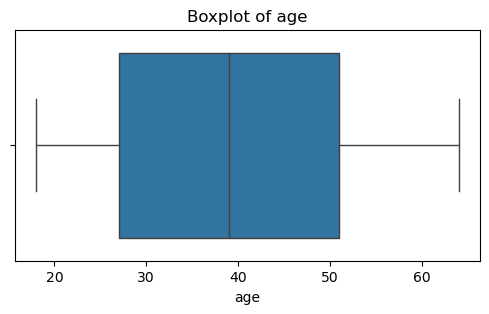

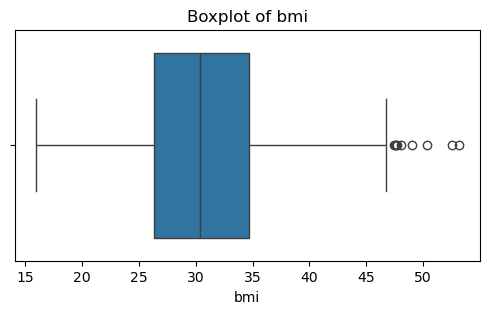

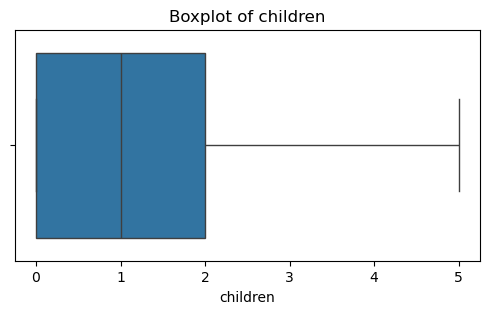

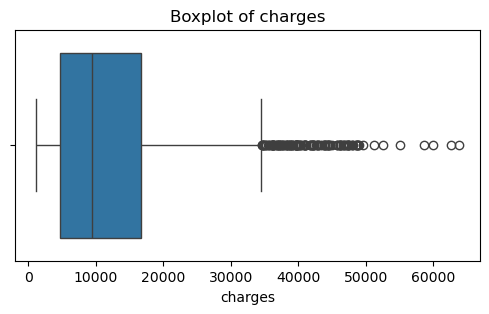

In [5]:
# Preview the first few rows to understand the dataset
df.head()

# Check dataset structure: number of rows, columns, and data types
df.info()

# List data types of all columns
df.dtypes

# Separate numerical columns (int and float types)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

# Quick statistical summary of numerical columns to spot anomalies
df[numerical_cols].describe()

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### Insights: Data Understanding & Description

We explored the dataset to understand its structure, data types, and potential anomalies.

- **Dataset size:** 1338 records, 7 columns
- **Numerical features:** `age`, `bmi`, `children`, `charges`
- **Categorical features:** `sex`, `smoker`, `region`
- **Missing values:** None detected

**Outlier Check (Numerical Features)**
- **Age:** No outliers, ranges from 18 to 64
- **BMI:** 9 potential outliers (47.4 – 53.1)
- **Children:** No outliers, ranges 0 to 5
- **Charges:** 139 potential outliers, high medical costs skew the distribution

**Feature Understanding & Hypotheses**
- **Smoker:** Likely higher charges  
- **Age:** Older individuals may have higher medical costs  
- **BMI:** Higher BMI could lead to higher claim amounts  
- **Children:** Small possible impact on charges  
- **Region:** May influence costs due to local healthcare variations


---

<h2 align="center">📌 Step 3: Data Cleaning & Preparation</h2>

Prepare the dataset for modeling:

- **Check for missing values and duplicates** → ensure data integrity.  
- **Encode categorical variables** (`sex`, `smoker`, `region`) into numeric form.  
- **Verify target variable** (`charges`) is numeric; decide whether to use log-transformed values.  
- **Scale continuous features** (`age`, `bmi`, `children`) if needed.  
- **Split dataset** into training and testing sets (e.g., 80/20).  
- **Document all transformations** for transparency.


In [8]:
# 1. Check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# 2. Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# drop_first=True avoids multicollinearity in linear regression

# 3. Verify target variable
# If we decide to use log transformation
import numpy as np
df_encoded['charges_log'] = np.log(df_encoded['charges'])

# 4. Scale continuous variables 
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# 5. Split into train and test sets
X = df_encoded.drop(['charges', 'charges_log'], axis=1)  # features
y = df_encoded['charges_log']  # target variable, can switch to 'charges' if raw

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Duplicate rows: 1
Training set shape: (1070, 8)
Testing set shape: (268, 8)


### Insights: Data Cleaning & Preparation</h2>

- **Missing values:** None detected in any column.  
- **Duplicate rows:** 1 duplicate found (can be removed).  
- **Categorical encoding:** Applied to `sex`, `smoker`, `region`.  
- **Target variable:** `charges` confirmed numeric; log transformation applied.  
- **Continuous features scaled:** `age`, `bmi`, `children`.  
- **Train-test split:** 1070 training rows, 268 testing rows (80/20 split).  


---

<h2 align="center">📌 Step 4: Exploratory Data Analysis (EDA)</h2>

EDA is performed in **three sections** to understand distributions, relationships, and correlations.

### 1. Univariate Analysis

We first explore the distribution of numerical features to understand their range, spread, and potential skewness.

- **age, bmi, children, charges**: Histograms with KDE show the spread and identify any unusual patterns or extreme values.  
- These insights help us understand which variables may need transformation or scaling before modeling.


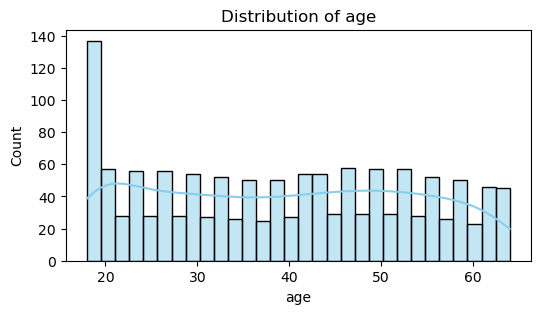

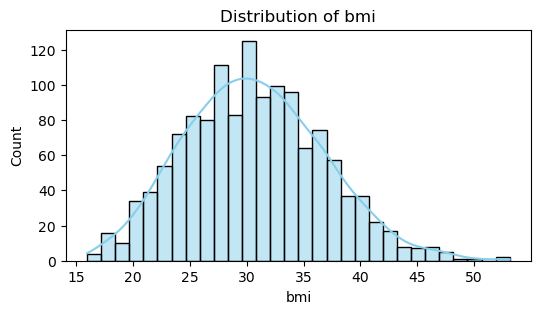

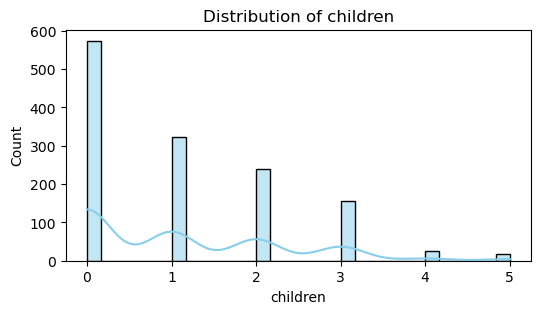

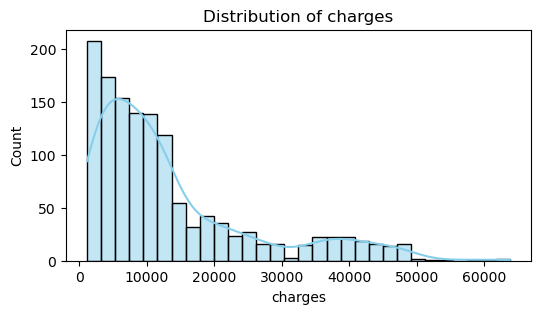

In [23]:
# Numerical features - histograms
numerical_features = ['age', 'bmi', 'children', 'charges']
for col in numerical_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()


### Univariate Analysis & Insights

We examined the distributions of numerical features to understand their patterns:

- **Age**: Mostly adults, spread from 18 to 64, median 39 — balanced age representation.  
- **BMI**: Ranges from 16 to 53, median around 30, showing many are overweight.  
- **Children**: Majority have 0–2 children; very few with more.  
- **Charges**: Wide range (1.1k to 63.7k), indicating high variability in insurance costs.

**Insights**: Skewness in `charges` and `BMI` suggests potential impact on model performance; these may need transformation or careful handling.

---

### 2. Bivariate Analysis

We now examine how each feature relates to the target variable, `charges`.

- **Numerical vs Charges**: Scatterplots of `age`, `bmi`, and `children` against `charges`, colored by smoker status, reveal trends and patterns.  
    - Observations: BMI and age tend to have a positive correlation with charges.  
    - Children show minimal impact on charges.  
- **Categorical vs Charges**: Boxplot for `smoker` vs `charges` highlights the significant difference in average charges between smokers and non-smokers.  
- Text summaries with quartiles/intervals provide numeric insight alongside visualizations.


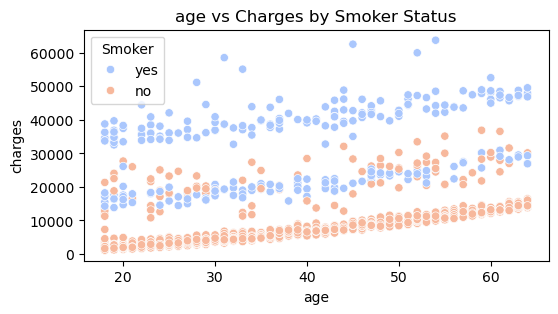

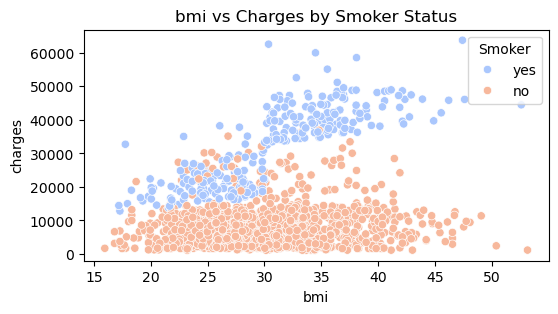

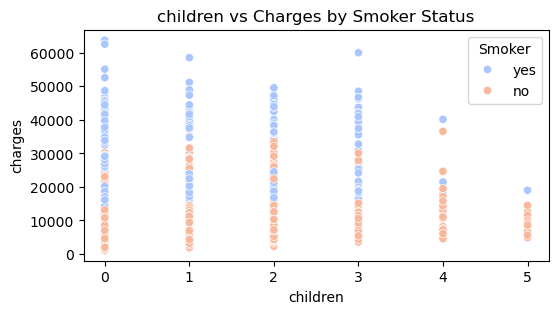

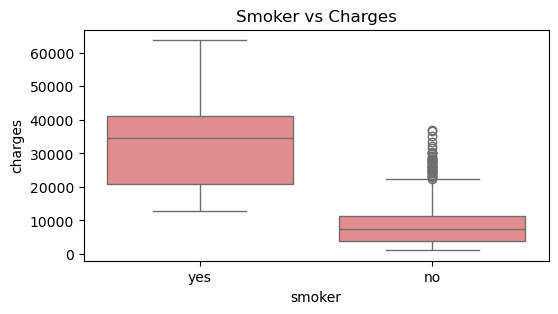

In [25]:
# Numerical vs Charges - scatterplots
for col in ['age', 'bmi', 'children']:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=df[col], y=df['charges'], hue=df['smoker'], palette="coolwarm")
    plt.title(f"{col} vs Charges by Smoker Status")
    plt.legend(title='Smoker')
    plt.show()


# Categorical vs Charges - boxplot for smoker only
plt.figure(figsize=(6,3))
sns.boxplot(x=df['smoker'], y=df['charges'], color='lightcoral')
plt.title("Smoker vs Charges")
plt.show()


### Bivariate Analysis & Insights

Examining relationships between features and insurance charges:

- **Age vs Charges**: Older individuals generally have higher charges — positive trend.  
- **BMI vs Charges**: Higher BMI corresponds to higher medical costs.  
- **Children vs Charges**: Minimal effect; number of children doesn’t significantly impact charges.  
- **Smoker vs Charges**: Smokers have dramatically higher average charges (~32k vs 8.4k for non-smokers).

**Insights**: Lifestyle factors (smoking, BMI) are stronger drivers of insurance costs than demographics like number of children. Targeting these features is crucial for predictive modeling.
 
 ---

### 3. Correlation Analysis

- Correlation heatmap for numerical features (`age`, `bmi`, `children`, `charges`) identifies which variables have the strongest linear relationships with the target.  
- Observations: BMI and age show positive correlation with charges, while children has weak correlation.  
- This informs which features are likely most influential in the predictive model.


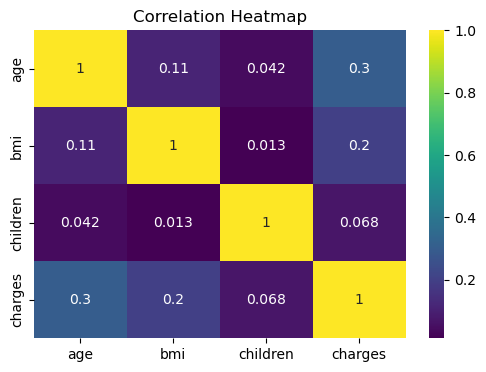


Correlation values:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [26]:
# Correlation heatmap for numerical features
plt.figure(figsize=(6,4))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

print("\nCorrelation values:")
print(corr)


### Correlation Analysis & Insights

Correlation of numerical features with `charges`:

- **Age (0.30)** and **BMI (0.20)** show moderate positive correlation.  
- **Children (0.07)** has negligible correlation.

**Insights**: Age, BMI, and especially smoking status are key influencers of insurance costs. These features will be central in building an accurate predictive model.


---
<h2 align="center">📌 Step 5: Model Training</h2>

**Objective:** Train a Linear Regression model to predict medical insurance charges using the prepared training dataset.

**Approach:**  
- Utilize the pre-split training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`).  
- Fit a Linear Regression model on `X_train` and `y_train`.  
- Generate predictions (`y_pred`) for the testing set — these will be used in Step 6 for evaluation.

**Justification:**  
- Linear Regression is suitable because the target variable (`charges`) is continuous.  
- It provides interpretability: model coefficients quantify the effect of each feature on medical costs.


In [27]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict charges on the test dataset
y_pred = lr_model.predict(X_test)


---
<h2 align="center">📌 Step 6: Model Evaluation</h2>

**Objective:** Evaluate how well the Linear Regression model predicts insurance charges.

**Approach:**  
- Compute MAE (Mean Absolute Error) to understand average prediction deviation.  
- Compute RMSE (Root Mean Squared Error) to penalize larger errors and highlight outlier impact.  
- Analyze residuals (differences between actual and predicted charges) to check linearity and detect underfitting or overfitting.

**Insights:**  
- MAE and RMSE indicate general prediction accuracy.  
- Residual analysis helps identify if high-charge outliers are predicted poorly.  
- Strengths: Model captures main trends (e.g., age, BMI, smoker).  
- Limitations: Struggles with extreme charges; may require transformations or advanced models for better handling of outliers.


Mean Absolute Error (MAE): 0.27
Root Mean Squared Error (RMSE): 0.42


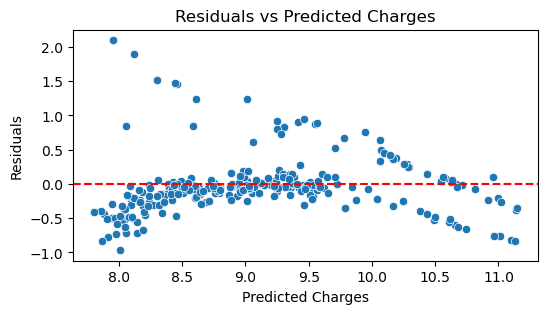

In [28]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Optional: Residuals analysis
residuals = y_test - y_pred
plt.figure(figsize=(6,3))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges")
plt.show()

### Insights: Model Evaluation – Linear Regression  

**Insights:**  
- **MAE:** 0.27 → On average, predictions differ from actual charges by 27% (or 0.27 in normalized/log scale).  
- **RMSE:** 0.42 → Larger errors are penalized more; model struggles slightly with extreme high charges.  
- **Observation:** Linear Regression captures overall trends reasonably well but underestimates outliers. It is interpretable and shows the quantitative effect of features on charges, but prediction accuracy can be improved for non-linear patterns.  


---
<h2 align="center">📌 Step 7: Additional Model – Random Forest Regressor</h2> 

**Objective:**  
- Predict insurance charges based on personal and lifestyle data.  
- Linear Regression is chosen as the primary model because:  
  - The target variable (`charges`) is continuous.  
  - It is interpretable; we can quantify the effect of each feature on predicted charges.  
  - Provides a baseline to understand data relationships and model performance before trying more complex models.  

**Expected Outcome:**  
- Capture linear trends between features (age, BMI, smoker status, etc.) and charges.  
- Establish benchmark performance metrics (MAE, RMSE) for comparison.  


Random Forest Regressor Performance:
MAE: 0.20
RMSE: 0.37


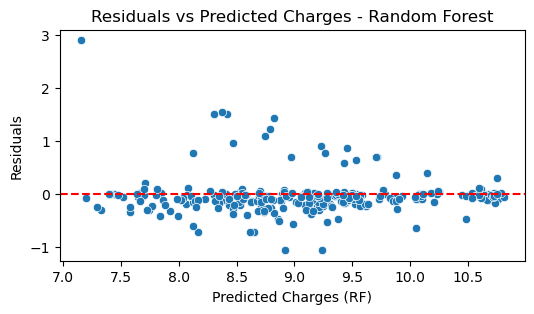

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest Regressor Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

# Residual analysis
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6,3))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges (RF)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges - Random Forest")
plt.show()


**Random Forest Regressor Results**  
- **MAE:** 0.20  
- **RMSE:** 0.37  
- **Insights:**  
  - Handles non-linear relationships better.  
  - Captures high-charge outliers more accurately.  
  - Less interpretable but stronger predictive performance.  

**Comparison & Takeaways:**  
- Random Forest gives better prediction accuracy than Linear Regression (lower MAE and RMSE).  
- Linear Regression provides interpretability, Random Forest provides performance.  
- Recommendation: Use Linear Regression for insight into feature influence, Random Forest for more precise charge predictions.  

---
<h2 align="center">📌 Step 8: Insights & Conclusion</h2> 

**Key Findings from EDA and Modeling:**
- **Smoking Status:** Smokers incur significantly higher insurance charges; this is the strongest predictor of cost.  
- **BMI:** Higher BMI is associated with increased medical expenses, especially when combined with smoking.  
- **Age:** Older individuals tend to have higher charges, though the effect is moderate.  
- **Children, Gender, Region:** These features have comparatively lower impact on charges.

**Business Value:**
- Insurance companies can use these insights to adjust premium pricing, target policies, and design personalized plans based on risk factors (e.g., smoker status, BMI).  
- Customers with healthier lifestyles could benefit from lower premiums, promoting preventive healthcare behavior.

**Limitations:**
- Dataset has limited features; lifestyle and medical history variables are not included.  
- Linear Regression assumes linearity, which may not capture all non-linear relationships.  
- Outliers (very high charges) can influence predictions, though Random Forest improves accuracy for such cases.

**Next Steps / Recommendations:**
- Experiment with advanced models (XGBoost) for better predictive accuracy.  
- Engineer new features (e.g., interaction terms like BMI × smoker).  
- Address non-linearity using polynomial regression or other transformation techniques.  
- Consider log transformation and scaling for better handling of skewed distributions.  
